In [2]:
import numpy as np

from PIL import Image

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Open image and make into numpy array
im=np.array(Image.open("img/421234_89068.jpeg").convert('RGB'))

# Work out what we are looking for
sought = [254,254,254]

# Find all pixels where the 3 RGB values match "sought", and count them
result = np.count_nonzero(np.all(im==sought,axis=2))
print(result)

total = np.count_nonzero(im)
print(total)

print('area portion: ' + str( result /total) )



645
3962418
area portion: 0.00016277939379439525


#np.array(Image.open("img/zigbang.png"))


image = cv2.imread('img/zigbang.png', cv2.COLOR_BGR2RGB )#cv2.IMREAD_COLOR)
plt.imshow(image)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

!pip install extcolors

!pip install colormap

!pip install easydev

In [4]:
import cv2
import extcolors

from colormap import rgb2hex

In [5]:

output_width = 900                   #set the output size
img = Image.open("img/zigbang.png")
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)


In [6]:
Image.open("img/zigbang.png").size

(900, 601)

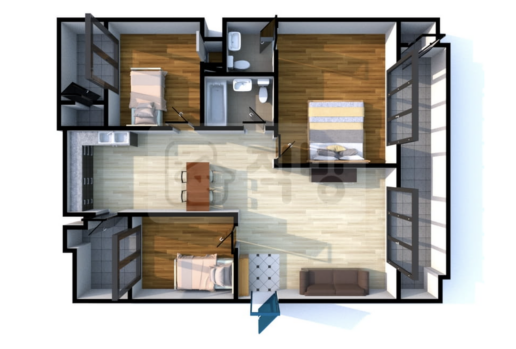

In [7]:

#save
resize_name = "img/zigbang.png"  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:

colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((255, 255, 255), 188339),
  ((147, 147, 147), 59819),
  ((224, 210, 207), 53718),
  ((67, 68, 71), 46804),
  ((97, 106, 120), 30048),
  ((0, 0, 0), 29361),
  ((87, 64, 33), 27331),
  ((139, 91, 62), 26174),
  ((220, 237, 253), 16216),
  ((38, 38, 38), 9405),
  ((176, 179, 172), 8347),
  ((159, 113, 62), 8340)],
 540900)

In [9]:

colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 24)
colors_x

([((255, 255, 255), 188339),
  ((147, 147, 147), 59819),
  ((224, 210, 207), 53718),
  ((67, 68, 71), 46804),
  ((97, 106, 120), 30048),
  ((0, 0, 0), 29361),
  ((87, 64, 33), 27331),
  ((139, 91, 62), 26174),
  ((220, 237, 253), 16216),
  ((38, 38, 38), 9405),
  ((176, 179, 172), 8347),
  ((159, 113, 62), 8340),
  ((187, 201, 222), 8080),
  ((120, 109, 96), 6579),
  ((244, 236, 216), 5099),
  ((250, 227, 180), 3406),
  ((144, 162, 188), 3307),
  ((210, 197, 173), 2375),
  ((115, 95, 66), 2183),
  ((46, 35, 16), 1905),
  ((38, 94, 124), 1370),
  ((160, 149, 128), 1153),
  ((172, 140, 92), 407),
  ((110, 56, 27), 307)],
 540900)

In [10]:
import pandas as pd 


def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_rgb, df_color_up, df_percent), columns = ['rgb', 'c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,rgb,c_code,occurence
0,"(255, 255, 255)",#FFFFFF,188339
1,"(147, 147, 147)",#939393,59819
2,"(224, 210, 207)",#E0D2CF,53718
3,"(67, 68, 71)",#434447,46804
4,"(97, 106, 120)",#616A78,30048
5,"(0, 0, 0)",#000000,29361
6,"(87, 64, 33)",#574021,27331
7,"(139, 91, 62)",#8B5B3E,26174
8,"(220, 237, 253)",#DCEDFD,16216
9,"(38, 38, 38)",#262626,9405


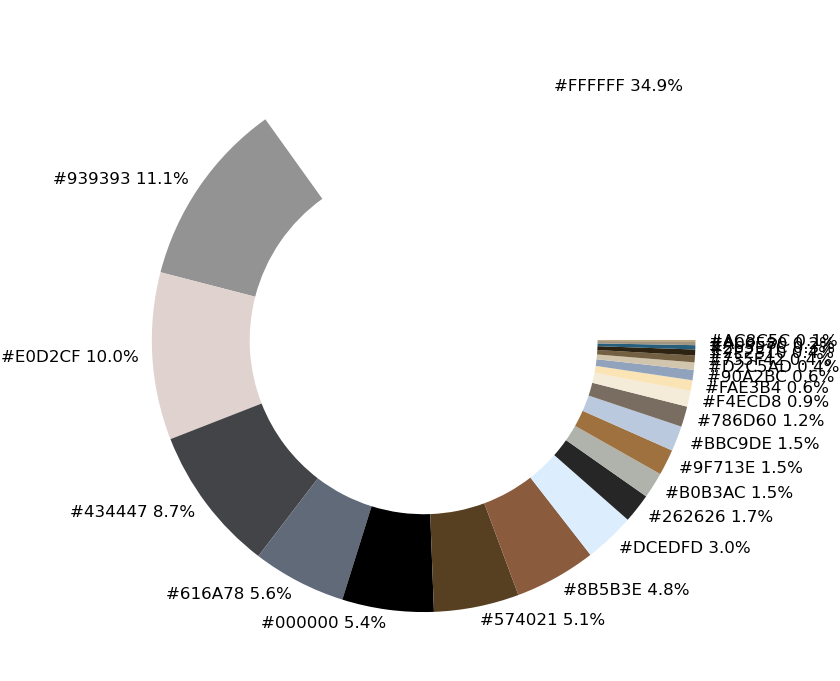

In [13]:

list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

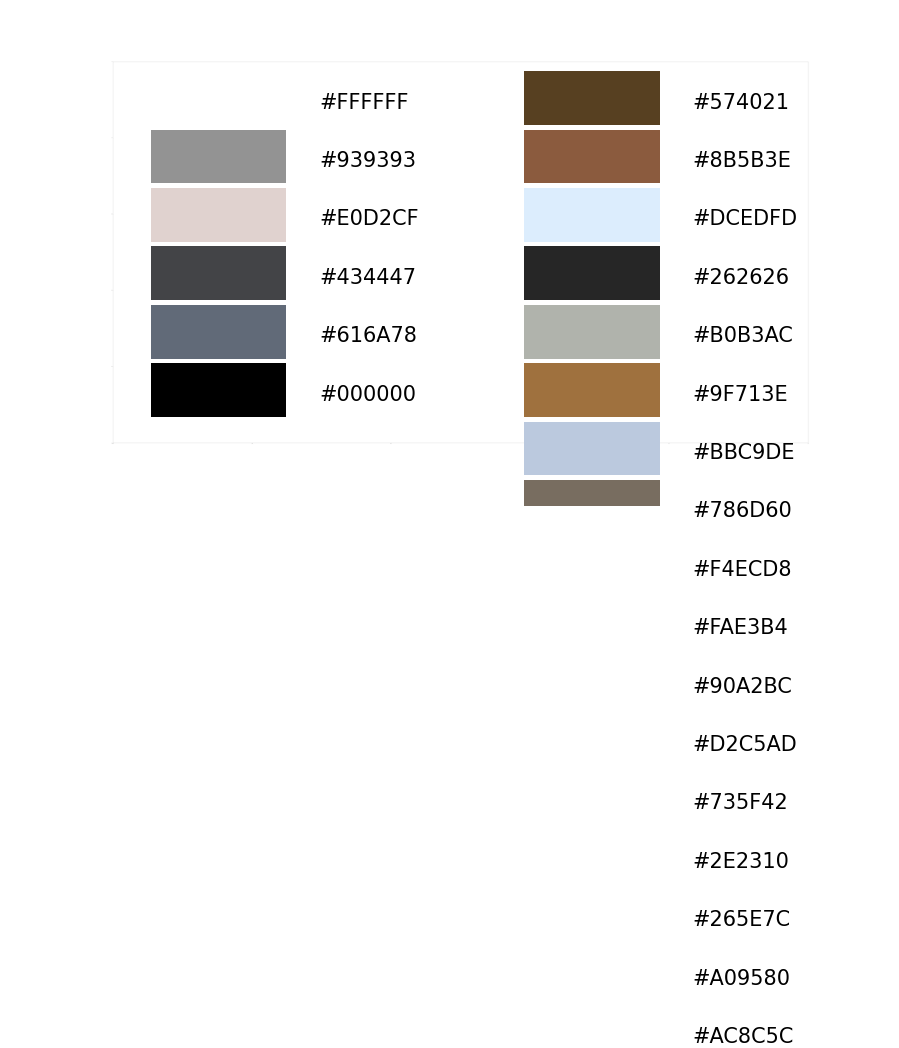

In [16]:

import matplotlib.pyplot as plt

#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()


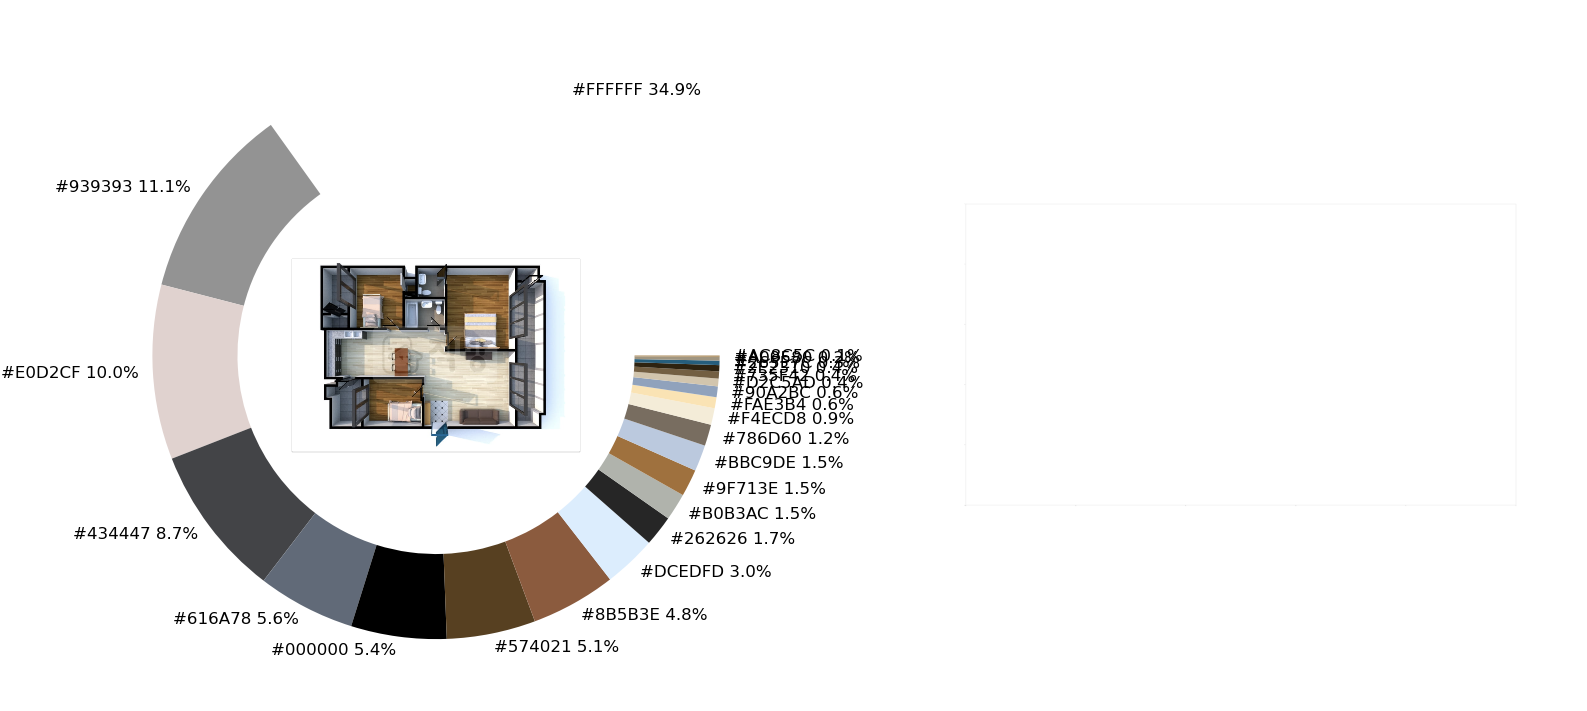

In [18]:
img = mpimg.imread('img/zigbang.png')
bg = plt.imread('bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

#donut plot
wedges, text = ax1.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'})
plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=2.3)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

"""
#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})
"""

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()